In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
stroke_df = pd.read_csv("/Users/rinabitas/Documents/Stroke-Prediction/Data/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke_df.dropna(inplace=True)

In [6]:
stroke_df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [25]:
stroke_df.groupby('gender')["age","stroke"].mean()

/var/folders/51/7l3vczns4mgg1f0vd_3lscbr0000gn/T/ipykernel_31595/834939924.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stroke_df.groupby('gender')["age","stroke"].mean()


,age,stroke
gender,,
0,42.049130,0.044257
1,43.437805,0.041422
Other,26.000000,0.000000


In [7]:
stroke_df['ever_married'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [8]:
stroke_dummies = pd.get_dummies(stroke_df["work_type"])
stroke_dummies.head()

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
5,0,0,1,0,0


In [9]:
stroke_df = pd.concat([stroke_df, stroke_dummies], axis=1)

stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,0,0,1,0,0
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,0,0,1,0,0
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,0,0,1,0,0
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,0,0,1,0
5,56669,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1,0,0,1,0,0


In [10]:
stroke_df.drop(columns=['work_type'])


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children
0,9046,0,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,0,0,1,0,0
2,31112,0,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,0,0,1,0,0
3,60182,1,49.0,0,0,1,Urban,171.23,34.4,smokes,1,0,0,1,0,0
4,1665,1,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,0,0,0,1,0
5,56669,0,81.0,0,0,1,Urban,186.21,29.0,formerly smoked,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,1,13.0,0,0,0,Rural,103.08,18.6,Unknown,0,0,0,0,0,1
5106,44873,1,81.0,0,0,1,Urban,125.20,40.0,never smoked,0,0,0,0,1,0
5107,19723,1,35.0,0,0,1,Rural,82.99,30.6,never smoked,0,0,0,0,1,0
5108,37544,0,51.0,0,0,1,Rural,166.29,25.6,formerly smoked,0,0,0,1,0,0


In [11]:
stroke_df['Residence_type'].replace({'Urban': 1, 'Rural': 0}, inplace=True)


In [12]:
smoke_dummies = pd.get_dummies(stroke_df["smoking_status"])
smoke_dummies.head()


,Unknown,formerly smoked,never smoked,smokes
0,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
5,0,1,0,0


In [13]:
stroke_cleaned_df = pd.concat([stroke_df, smoke_dummies], axis=1)

stroke_cleaned_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,9046,0,67.0,0,1,1,Private,1,228.69,36.6,...,1,0,0,1,0,0,0,1,0,0
2,31112,0,80.0,0,1,1,Private,0,105.92,32.5,...,1,0,0,1,0,0,0,0,1,0
3,60182,1,49.0,0,0,1,Private,1,171.23,34.4,...,1,0,0,1,0,0,0,0,0,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.0,...,1,0,0,0,1,0,0,0,1,0
5,56669,0,81.0,0,0,1,Private,1,186.21,29.0,...,1,0,0,1,0,0,0,1,0,0


In [14]:
stroke_scaled_df = stroke_cleaned_df.drop(columns=['id', 'work_type', 'Residence_type', 'smoking_status'])
stroke_scaled_df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,0,67.0,0,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
2,0,80.0,0,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1,79.0,1,0,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0
5,0,81.0,0,0,1,186.21,29.0,1,0,0,1,0,0,0,1,0,0


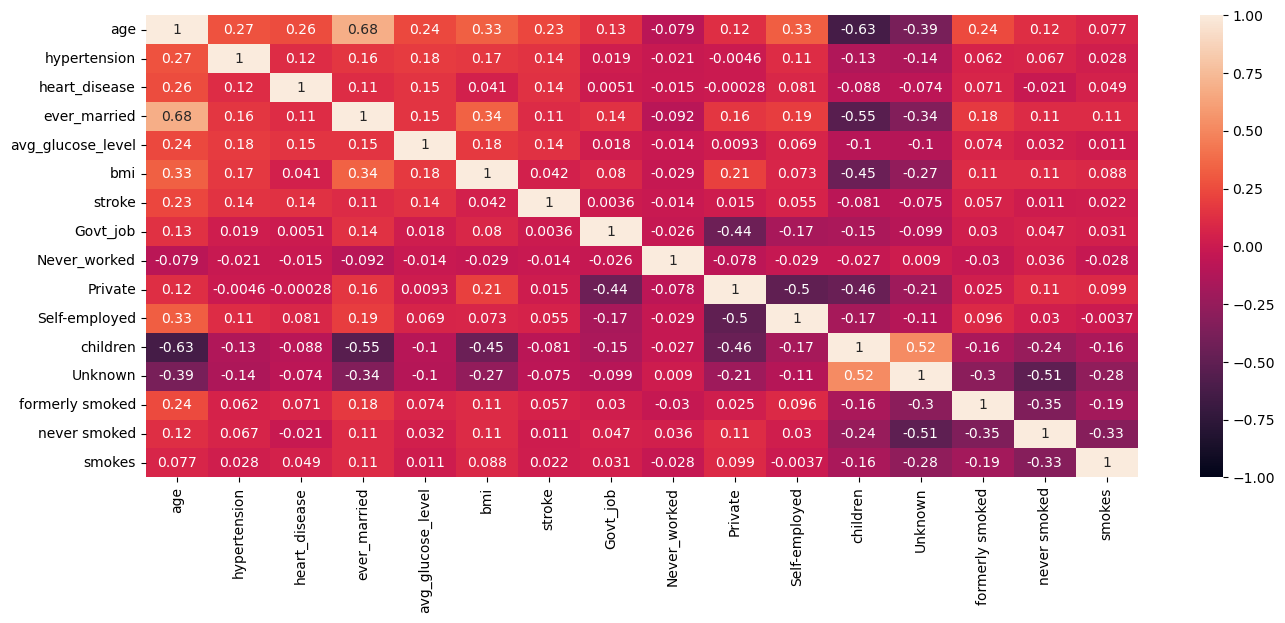

In [15]:
plt.figure(figsize=(16,6))
sns.heatmap(stroke_scaled_df.corr(), vmin=-1, vmax=1, annot=True);

Text(0.5, 1.0, 'Stroke Distribution by Age')

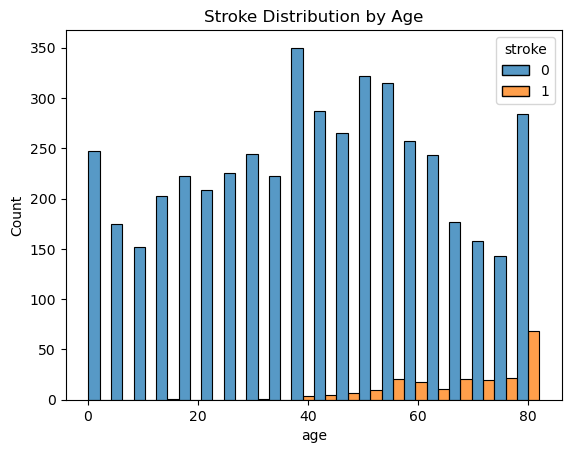

In [17]:
sns.histplot(data=stroke_scaled_df, x="age", hue="stroke", multiple="dodge").set_title("Stroke Distribution by Age")